x:(50, 1), weights:(1, 1), bias:(1,), y:(50, 1)


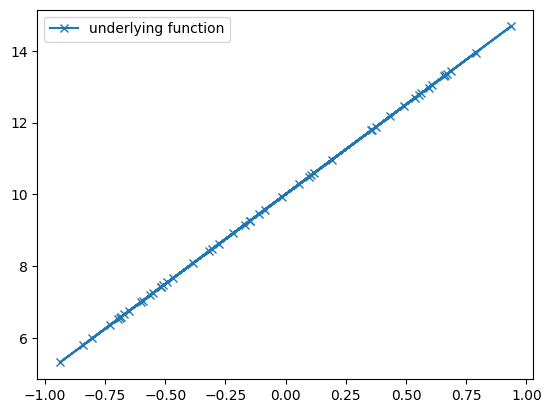

In [41]:
import numpy as np
import matplotlib.pyplot as plt

n = 50 
d = 1 
x = np.random.uniform(-1,1,(n,d))

weights_true = np.array([[5],])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
print(f'x:{x.shape}, weights:{weights_true.shape}, bias:{bias_true.shape}, y:{y_true.shape}')

plt.plot(x,y_true,marker='x',label='underlying function')
plt.legend()


Basic prediction function:Linear

<function matplotlib.pyplot.legend(*args, **kwargs)>

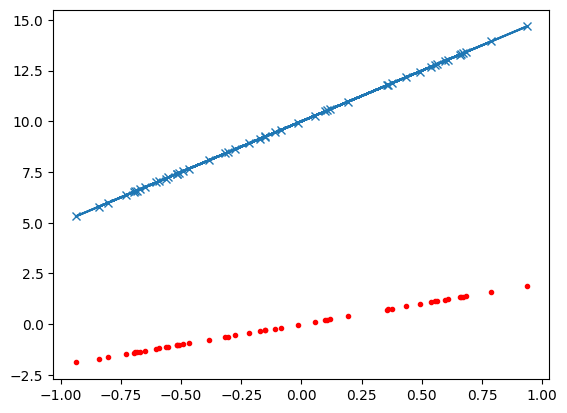

In [42]:
#initialise

class Linear:
    def __init__(self, num_input, num_output=1):
        self.weights = np.random.randn(num_input, num_output)*np.sqrt(2./num_input)
        self.bias = np.zeros((num_output))
    
    def __call__(self,x):
        return x@self.weights + self.bias
          
linear = Linear(d)
y_pred = linear(x)
plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x,y_pred, color='r', marker='.', label='our function')
plt.legend            
        
    

Basic loss function:MSE

In [43]:

class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_true-y_pred)**2).mean()

loss = MSE()
print(f'Our initial loss is {loss(y_pred,y_true)}')

Our initial loss is 97.90286800916229


Back propagation

In [53]:
class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_true-y_pred)**2).mean()
    
    def backward(self):
        n = self.y_true.shape[0]
        self.gradient = 2. * (self.y_pred-self.y_true)/n
        return self.gradient
    
class Linear:
    def __init__(self, input_dim: int, num_hidden: int=1):
        self.weights = np.random.randn(input_dim, num_hidden)-0.5
        self.bias = np.random.randn(num_hidden)-0.5
    
    def __call__(self,x):
        self.x=x
        output = x @ self.weights + self.bias
        return output

    def backward(self, gradient):
        self.weight_gradient = self.x.T @ gradient
        self.bias_gradient = gradient.sum(axis=0)
        self.x_gradient = gradient @ self.weights.T
        return self.x_gradient
    
    def update(self, lr):
        self.weights = self.weights - lr * self.weight_gradient
        self.bias = self.bias - lr * self.bias_gradient
    


    

In [45]:
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(f'loss:{loss(y_pred,y_true)}')
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x)
print(f'loss:{loss(y_pred,y_true)}')

loss:110.0596853318225
loss:72.4428173765451


Training using gradients

Epoch:0, loss:126.60697311809585
Epoch:5, loss:19.66091445318702
Epoch:10, loss:5.688321277712889
Epoch:15, loss:2.6648515857628383
Epoch:20, loss:1.4599630589763337
Epoch:25, loss:0.8269720124894725
Epoch:30, loss:0.471397325124239
Epoch:35, loss:0.2690249193417223
Epoch:40, loss:0.15356485152582441
Epoch:45, loss:0.0876614097220803
Epoch:50, loss:0.05004126357032243
Epoch:55, loss:0.028565950036182754


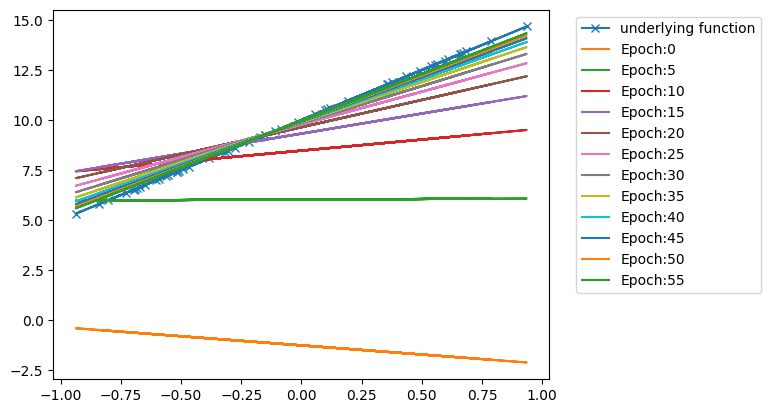

In [46]:
plt.plot(x,y_true,marker='x',label='underlying function')

loss = MSE()
linear = Linear(d)

num_epochs = 60
lr = 0.1

for epoch in range(num_epochs):
    y_pred = linear(x)
    loss_value = loss(y_pred, y_true)
    
    if epoch % 5 == 0:
        print(f'Epoch:{epoch}, loss:{loss_value}')
        plt.plot(x,y_pred.squeeze(),label=f'Epoch:{epoch}')
        
    gradient_from_loss = loss.backward()
    linear.backward(gradient_from_loss)
    linear.update(lr)
    
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left");


For 2D inputs

x:(100, 2), weights:(2, 1), bias:(1,), y:(100, 1)


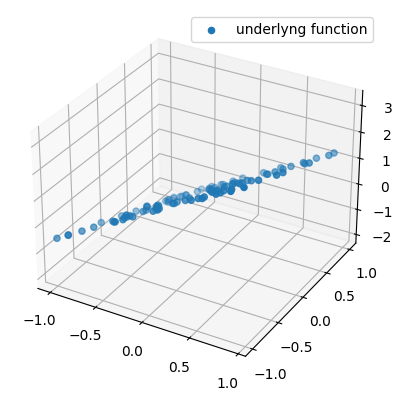

In [56]:
n = 100
d = 2 
x = np.random.uniform(-1,1,(n,d))

weights_true = np.array([[2,-1],]).T
bias_true = np.array([0.5])

y_true = x @ weights_true + bias_true
print(f'x:{x.shape}, weights:{weights_true.shape}, bias:{bias_true.shape}, y:{y_true.shape}')

def plot_3d(x,y,y_pred=None):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(x[:,0], x[:,1], y, label='underlyng function')
    if y_pred is not None:
        ax.scatter(x[:,0], x[:,1], y_pred, label='our function')
    plt.legend()
    
plot_3d(x,y_true)    

loss:4.745174698945729


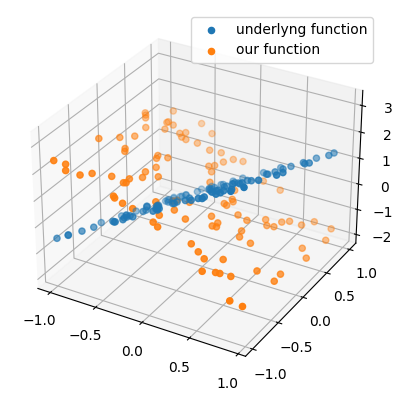

In [57]:
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(f'loss:{loss(y_pred,y_true)}')
fig = plot_3d(x,y_true,y_pred)

Epoch:0, loss:4.745174698945729
Epoch:1, loss:4.169319085660126
Epoch:2, loss:3.667900643017781
Epoch:3, loss:3.2296958394088766
Epoch:4, loss:2.8457027822760113
Epoch:5, loss:2.508551367947375
Epoch:6, loss:2.2121024620657503
Epoch:7, loss:1.9511703078712614
Epoch:8, loss:1.721325963340192
Epoch:9, loss:1.5187546194156374
Epoch:10, loss:1.3401492594126725
Epoch:11, loss:1.1826292617852823
Epoch:12, loss:1.0436764828816494
Epoch:13, loss:0.9210838835397058
Epoch:14, loss:0.8129133927834338
Epoch:15, loss:0.7174607577445145
Epoch:16, loss:0.6332258177648739
Epoch:17, loss:0.5588870940253449
Epoch:18, loss:0.4932798879130994
Epoch:19, loss:0.43537728526170094
Epoch:20, loss:0.38427360382864995
Epoch:21, loss:0.33916991986476197
Epoch:22, loss:0.2993613804806323
Epoch:23, loss:0.2642260608245621
Epoch:24, loss:0.2332151647519279
Epoch:25, loss:0.20584439853901834
Epoch:26, loss:0.18168637181213373
Epoch:27, loss:0.1603638999167947
Epoch:28, loss:0.14154409858677106
Epoch:29, loss:0.124933

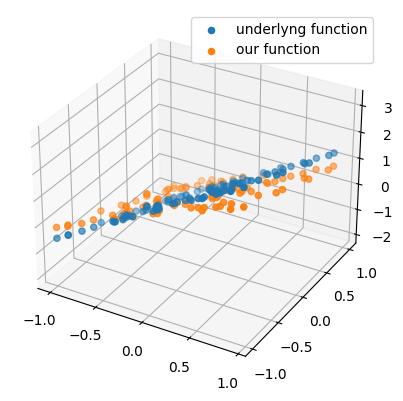

In [58]:
from typing import Callable

def fit(x:np.ndarray, y:np.ndarray, model:Callable, loss:Callable, lr:float, num_epochs: int):
    for epoch in range(num_epochs):
        y_pred  = model(x)
        loss_value = loss(y_pred,y)
        print(f'Epoch:{epoch}, loss:{loss_value}')
        gradient_from_loss = loss.backward()
        model.backward(gradient_from_loss)
        model.update(lr)
    
fit(x,y_true,model=linear,loss=loss,lr=0.1,num_epochs=30)   
plot_3d(x,y_true,linear(x)) 